In [220]:
import numpy as np
from PIL import Image as pim
%matplotlib inline
import subprocess

In [221]:
import torch
import torch.nn.functional as F

In [222]:
images_list = subprocess.getoutput('ls images/').split('\n')

In [223]:
images_list

['0001677.jpg',
 '0002136.jpg',
 '0002395.jpg',
 '0002755.jpg',
 '0007932.jpg',
 '0010830.jpg',
 '0010950.jpg',
 '0011033.jpg']

In [224]:
images = [pim.open('images/'+i) for i in images_list]

In [229]:
pim.fromarray(grayscaled_images.byte().numpy()[0][3]).save('car_b.png')

In [226]:
np_images = [np.array(i).transpose((2,0,1)) for i in images]

In [225]:
grayscaled_images = torch.Tensor([np.array([(i.sum(0)/3).astype('uint8') for i in np_images])])
grayscaled_images.shape

torch.Size([1, 8, 240, 320])

In [111]:
mean_filter = np.ones((1,8,1,1))/len(grayscaled_images[0])
mean_filter.shape

(1, 8, 1, 1)

In [117]:
mean_image = F.conv2d(grayscaled_images,torch.Tensor(mean_filter))
mean_image.shape

torch.Size([1, 1, 240, 320])

In [172]:
centered_images = grayscaled_images - mean_image

In [187]:
centered_images.byte()[0][6]

tensor([[ 245,  245,  245,  ...,  243,  236,  208],
        [ 245,  245,  246,  ...,  234,  228,  208],
        [ 246,  246,  246,  ...,   17,   11,  253],
        ...,
        [ 121,  129,  139,  ...,  236,  239,  241],
        [  91,   97,  105,  ...,  235,  236,  236],
        [   0,  248,  238,  ...,  241,  238,  237]], dtype=torch.uint8)

In [181]:
centered_images[0].byte().numpy()[6]

array([[245, 245, 245, ..., 243, 236, 208],
       [245, 245, 246, ..., 234, 228, 208],
       [246, 246, 246, ...,  17,  11, 253],
       ..., 
       [121, 129, 139, ..., 236, 239, 241],
       [ 91,  97, 105, ..., 235, 236, 236],
       [  0, 248, 238, ..., 241, 238, 237]], dtype=uint8)

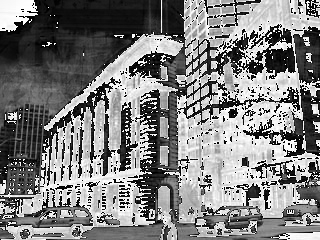

In [184]:
pim.fromarray(centered_images[0].byte().numpy()[6])

In [151]:
sqr_images = F.conv2d(centered_images.pow(2),torch.Tensor(mean_filter))

In [152]:
standard_deviation = sqr_images.sqrt()

In [197]:
new_images = centered_images/ standard_deviation

In [199]:
new_np_images = new_images[0].byte().numpy()

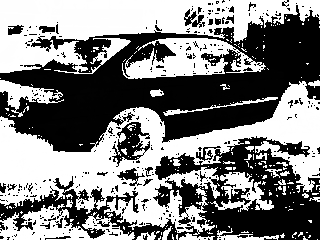

In [213]:
pim.fromarray(new_np_images[3])